# Initial Exploratory Data Analysis of Questionnaires Dataset

Note: This EDA is done prior to merging the dataset with progression.csv. As such, within this EDA, the sole focus is on understanding the datasets statistical characteristics and features utilised.

Following this analysis of all the individual datasets, there will be an EDA of all of the datasets merged, including progression.csv.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle('../../data/processed/questionnaires.pkl.bz2', compression='bz2')

/var/folders/k4/6jgt4x2s2rx4xnxf88z6wtr00000gn/T/ipykernel_45169/4076788515.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data.columns

Index(['clench_fist', 'clench_fist_score', 'cut_meat_knife',
       'cut_meat_knife_score', 'cut_scissors', 'cut_scissors_score',
       'fasten_buttons', 'fasten_buttons_score', 'handshake_no_reluctance',
       'lift_bottle',
       ...
       'KOOS_sport', 'KOOS_QOL', 'HOOS_pain', 'HOOS_symptoms', 'HOOS_ADL',
       'HOOS_sport', 'HOOS_QOL', 'Hands_Max_NRS_Last_Week',
       'Hip_Max_NRS_Last_Week', 'Knees_Max_NRS_Last_Week'],
      dtype='object', length=185)

In [5]:
data.shape

(297, 185)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1528020110022 to 1528020110426
Columns: 185 entries, clench_fist to Knees_Max_NRS_Last_Week
dtypes: Int64(162), category(5), float64(18)
memory usage: 468.5 KB


In [9]:
data.describe()

,clench_fist,clench_fist_score,cut_meat_knife,cut_meat_knife_score,cut_scissors,cut_scissors_score,fasten_buttons,fasten_buttons_score,handshake_no_reluctance,lift_bottle,...,KOOS_sport,KOOS_QOL,HOOS_pain,HOOS_symptoms,HOOS_ADL,HOOS_sport,HOOS_QOL,Hands_Max_NRS_Last_Week,Hip_Max_NRS_Last_Week,Knees_Max_NRS_Last_Week
count,293.0,293.0,293.0,293.0,293.0,293.0,291.0,291.0,294.0,294.0,...,291.000000,295.000000,294.00000,294.000000,294.000000,290.000000,292.000000,288.000000,287.000000,292.000000
mean,0.505119,0.505119,0.518771,0.518771,0.522184,0.522184,0.467354,0.467354,0.622449,0.595238,...,40.718786,46.038136,78.41884,80.242347,81.473750,72.334770,68.757135,4.055556,2.919861,4.777397
std,0.920174,0.920174,0.714686,0.714686,0.700063,0.700063,0.670666,0.670666,0.888093,0.794248,...,26.099298,20.781593,20.76187,20.734943,20.653671,28.230032,25.065837,3.130780,2.934695,2.695631
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-6.250000,-2.50000,0.000000,4.411765,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.000000,31.250000,67.50000,66.250000,69.117647,56.250000,50.000000,1.000000,0.000000,2.750000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.000000,43.750000,85.00000,85.000000,89.705882,75.000000,75.000000,4.000000,2.000000,5.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,60.000000,62.500000,97.50000,100.000000,100.000000,100.000000,93.750000,7.000000,6.000000,7.000000
max,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,...,100.000000,93.750000,97.50000,100.000000,100.000000,100.000000,93.750000,10.000000,10.000000,10.000000


### Investigate Categorical Columns

In [10]:
categorical_cols = data.select_dtypes(include=['category', 'object']).columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for pain_attacks_no_pain_inbetween:
pain_attacks_no_pain_inbetween
0    197
1     87
Name: count, dtype: int64


Value counts for pain_attacks_pain_inbetween:
pain_attacks_pain_inbetween
0    245
1     37
Name: count, dtype: int64


Value counts for pain_radiates:
pain_radiates
0    145
1    103
Name: count, dtype: int64


Value counts for persistent_pain_attacks:
persistent_pain_attacks
0    223
1     61
Name: count, dtype: int64


Value counts for persistent_pain_slight:
persistent_pain_slight
0    197
1     90
Name: count, dtype: int64




### Investigate Data Quality

In [11]:
# Check for missing data
data.isnull().sum()

clench_fist                 4
clench_fist_score           4
cut_meat_knife              4
cut_meat_knife_score        4
cut_scissors                4
                           ..
HOOS_sport                  7
HOOS_QOL                    5
Hands_Max_NRS_Last_Week     9
Hip_Max_NRS_Last_Week      10
Knees_Max_NRS_Last_Week     5
Length: 185, dtype: int64

In [12]:
# Percentage of missing data
data.isnull().sum() * 100 / len(data)

clench_fist                1.346801
clench_fist_score          1.346801
cut_meat_knife             1.346801
cut_meat_knife_score       1.346801
cut_scissors               1.346801
                             ...   
HOOS_sport                 2.356902
HOOS_QOL                   1.683502
Hands_Max_NRS_Last_Week    3.030303
Hip_Max_NRS_Last_Week      3.367003
Knees_Max_NRS_Last_Week    1.683502
Length: 185, dtype: float64

In [5]:
# Calculate the percentage of missing data for each column
missing_percentages = (data.isnull().sum() * 100 / len(data)).round(2)

# Convert to a DataFrame
missing_df = missing_percentages.reset_index()
missing_df.columns = ['Column', 'MissingPercentage']

# Group by the 'MissingPercentage' and count the number of columns in each group
missing_groups = missing_df.groupby('MissingPercentage').count()
missing_groups.columns = ['CountOfColumns']

missing_groups = missing_groups[missing_groups.index > 0]

missing_groups

,CountOfColumns
MissingPercentage,
0.34,27
0.67,26
1.01,43
1.35,33
1.68,21
2.02,8
2.36,6
2.69,1
3.03,2


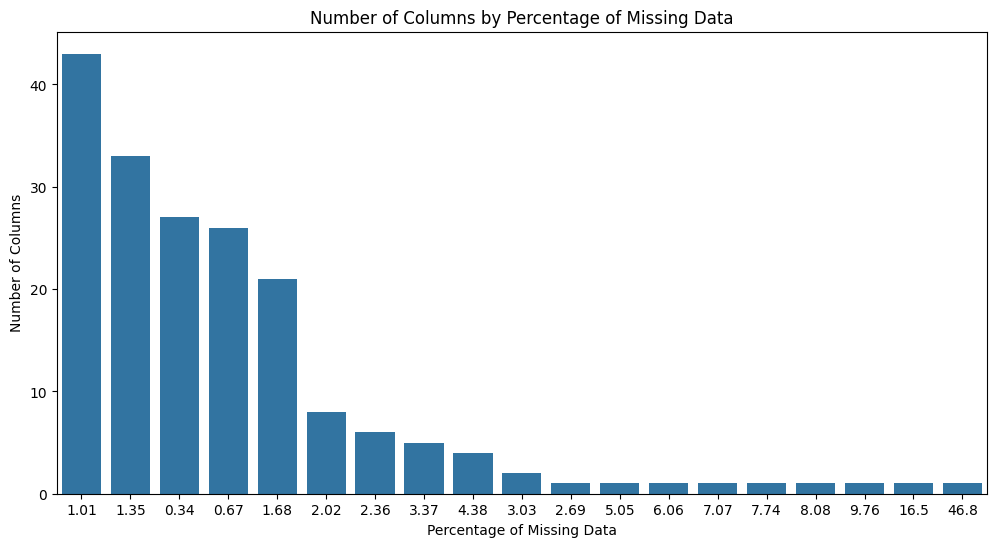

In [14]:
missing_groups.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='MissingPercentage', y='CountOfColumns', data=missing_groups,
            order=missing_groups.sort_values('CountOfColumns', ascending=False)['MissingPercentage'])

plt.title('Number of Columns by Percentage of Missing Data')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Number of Columns')

plt.show()

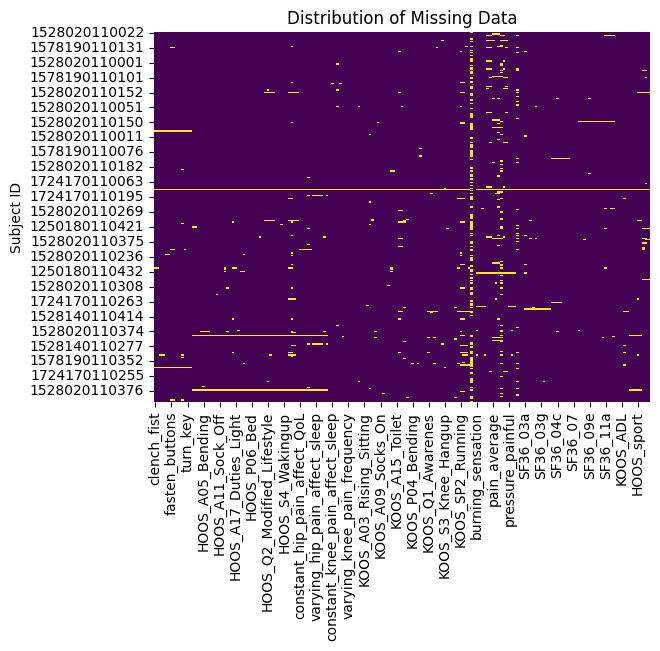

In [6]:
missing = data.isnull()

sns.heatmap(missing, cbar=False, cmap="viridis")
plt.title("Distribution of Missing Data")
plt.show()

In [17]:
# Check for duplicated data
data.duplicated().sum()

0

### Multivariant Analysis

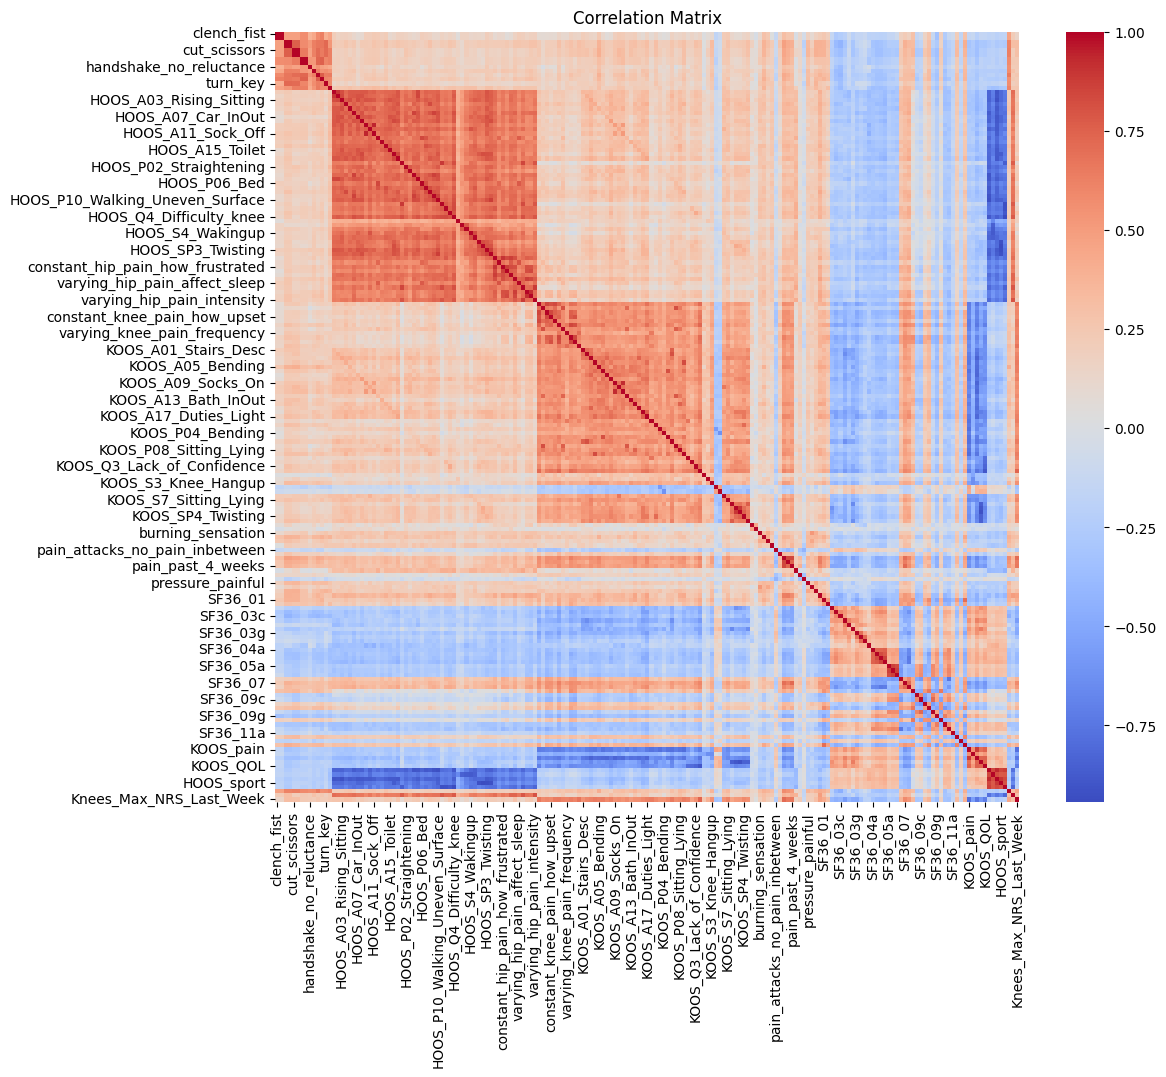

In [7]:
corr = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()